<a href="https://colab.research.google.com/github/bunny346/APPLICATIONS-OF-DATA-MINING/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 49830096.855908394
R^2 Score: 0.9024461774180497


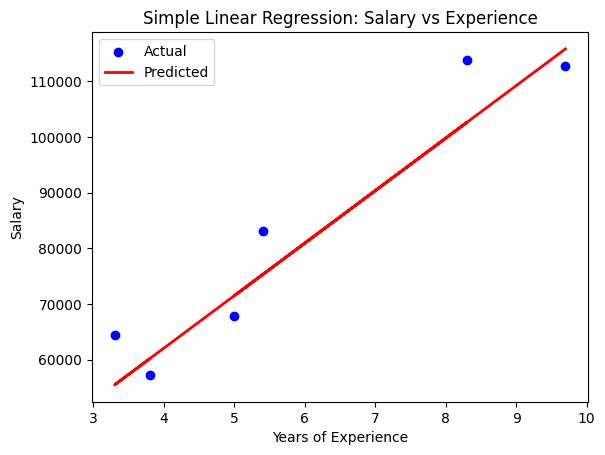

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/SLR_Salary_dataset (1).csv"
df = pd.read_csv(file_path)

# Drop the unnamed index column
df = df.drop(columns=['Unnamed: 0'])

# Define independent and dependent variables
X = df[['YearsExperience']]
y = df['Salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression: Salary vs Experience')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
file_path = "/content/SLR_Salary_dataset (1).csv"
advertising = pd.DataFrame(pd.read_csv(file_path))
print(advertising.head())
print("Dataset Shape:", advertising.shape)
print("Dataset Info:")
advertising.info()
print("Dataset Description:")
print(advertising.describe())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
Dataset Shape: (30, 3)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
Dataset Description:
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.5000

In [ ]:
# Checking Null values
null_values = advertising.isnull().sum() * 100 / advertising.shape[0]
print("Null Values in Dataset (%):\n", null_values)
print("There are no NULL values in the dataset, hence it is clean.")

Null Values in Dataset (%):
 Unnamed: 0         0.0
YearsExperience    0.0
Salary             0.0
dtype: float64
There are no NULL values in the dataset, hence it is clean.


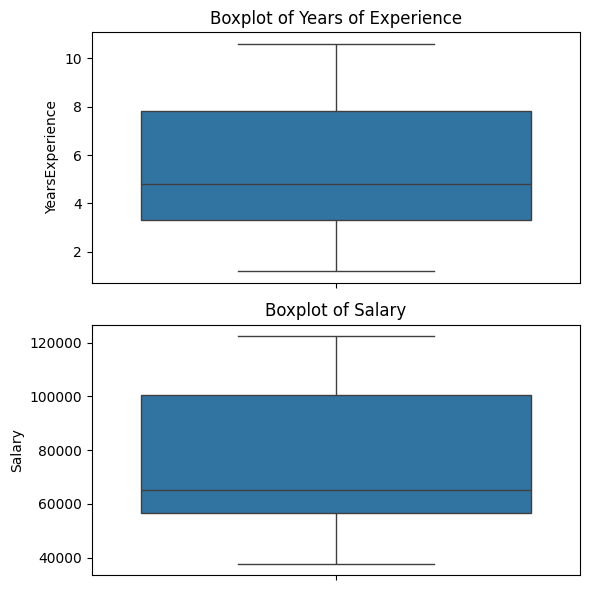

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2, figsize=(6, 6))
sns.boxplot(advertising['YearsExperience'], ax=axs[0])
axs[0].set_title('Boxplot of Years of Experience')
sns.boxplot(advertising['Salary'], ax=axs[1])
axs[1].set_title('Boxplot of Salary')
plt.tight_layout()
plt.show()

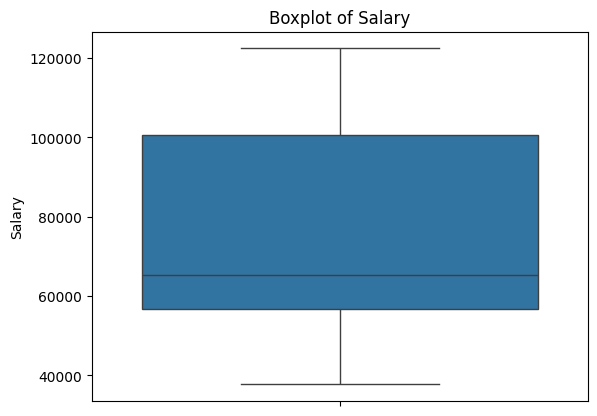

In [ ]:
# Boxplot for Salary
sns.boxplot(advertising['Salary'])
plt.title('Boxplot of Salary')
plt.show()

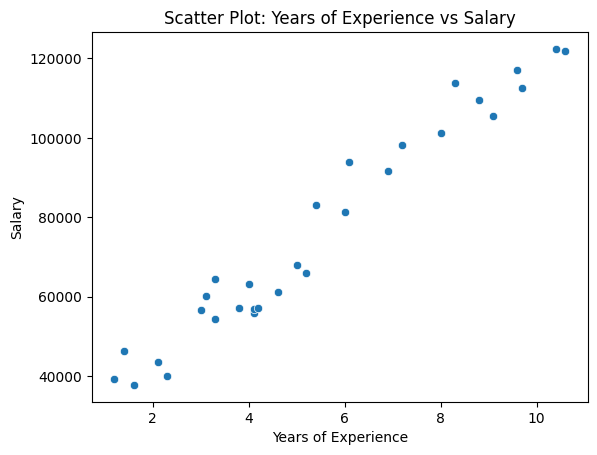

In [ ]:
# Scatter plot to see the relationship between YearsExperience and Salary
sns.scatterplot(x=advertising['YearsExperience'], y=advertising['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot: Years of Experience vs Salary')
plt.show()

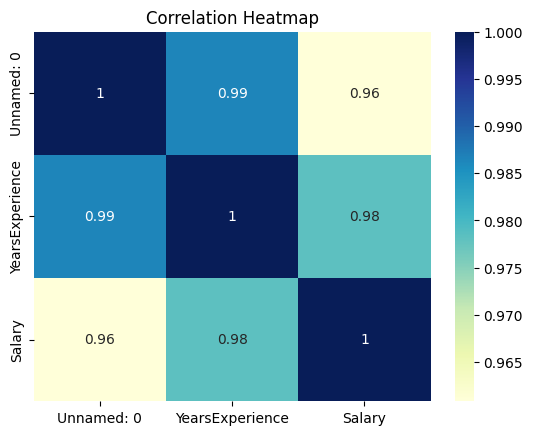

In [ ]:
# Correlation heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Drop the unnamed index column if it exists
if 'Unnamed: 0' in advertising.columns:
    advertising = advertising.drop(columns=['Unnamed: 0'])

In [ ]:
# Define independent and dependent variables
X = advertising[['YearsExperience']]
y = advertising['Salary']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Display first few rows of X_train and y_train
print("X_train Head:\n", X_train.head())
print("y_train Head:\n", y_train.head())

X_train Head:
     YearsExperience
17              5.4
22              8.0
11              4.1
4               2.3
29             10.6
y_train Head:
 17     83089.0
22    101303.0
11     55795.0
4      39892.0
29    121873.0
Name: Salary, dtype: float64


In [ ]:
# Train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fit the regression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print regression parameters
print("Regression Parameters:\n", lr.params)

Regression Parameters:
 const              24230.767402
YearsExperience     9731.203838
dtype: float64


In [ ]:
# Print model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        04:56:09   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.423e+04   2921.388     

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [ ]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
# Display first few rows of y_pred
print("y_pred Head:\n", y_pred.head())

y_pred Head:
 9      61209.341988
26    117650.324249
28    125435.287320
13     65101.823523
5      53424.378917
dtype: float64


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 30310299.043402478
R^2 Score: 0.9627668685473266
Root Mean Squared Error: 5505.479002176148


In [ ]:
# Compute R-squared value
r_squared = r2_score(y_test, y_pred)
print(f'R-squared Value: {r_squared}')

R-squared Value: 0.9627668685473266


In [ ]:
# Residual analysis
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

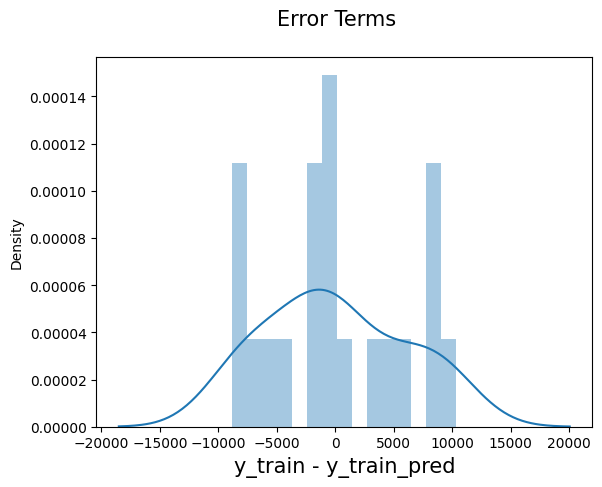

In [ ]:
# Distribution of residuals
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize=15)  # X-label
plt.show()

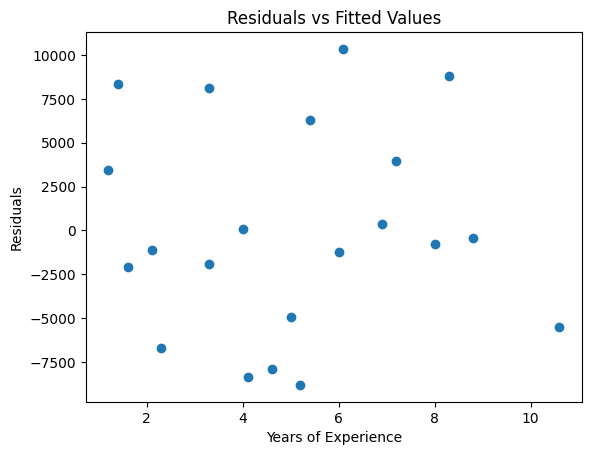

In [ ]:
# Residuals vs Fitted Values
plt.scatter(X_train, res)
plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

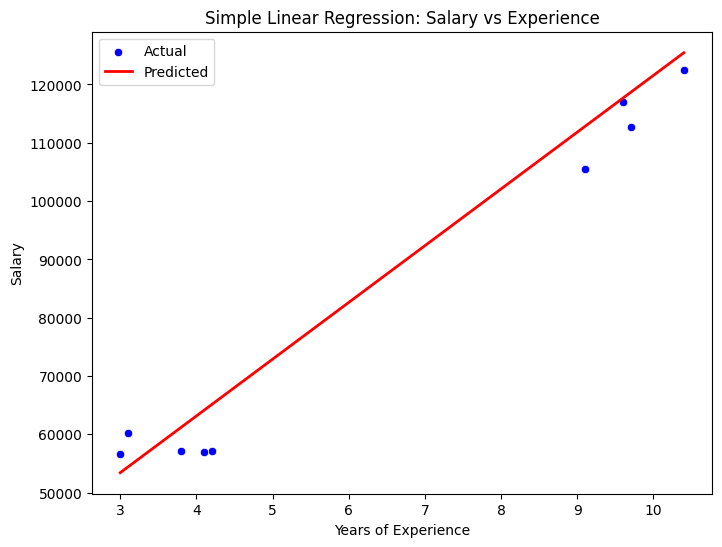

In [ ]:
# Plot the regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['YearsExperience'], y=y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression: Salary vs Experience')
plt.legend()
plt.show()

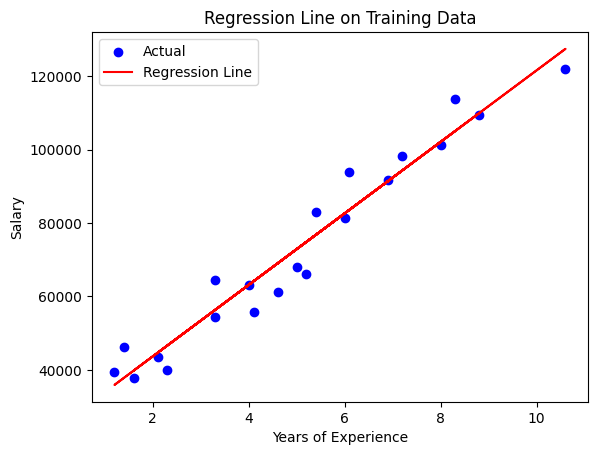

In [ ]:
# Scatter plot with regression line for training data
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line on Training Data')
plt.legend()
plt.show()

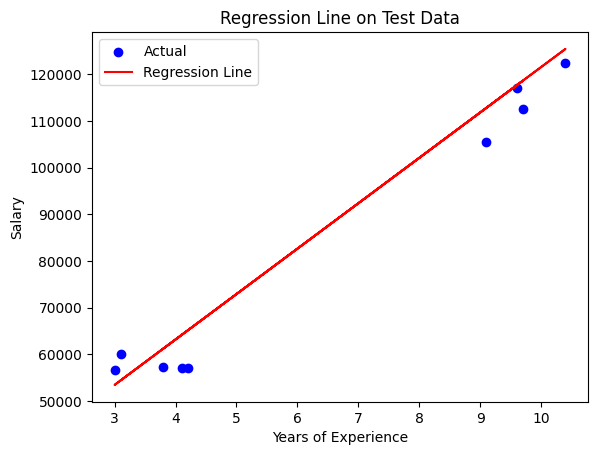

In [ ]:
# Scatter plot with regression line for test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, lr.params[0] + lr.params[1] * X_test, 'r', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line on Test Data')
plt.legend()
plt.show()
